# Analyzing Multiple Currencies

Looking to analyze multpile currencies at once from a high level and look at how their movements correlate to one another.

In [9]:
# Import tools
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
!pip install pandas_datareader -q
import pandas_datareader.data as web
import numpy as np
!pip install matplotlib -q
import matplotlib.pyplot as plt
!pip install seaborn -q
import seaborn as sns
import matplotlib.dates as mdates
!pip install plotly -q
import plotly.express as px

## The Currencies

In [113]:
# List of Cryptocurrencies
crypto_list = ['BTC', 'ETH', 'ADA',
               'XTZ', 'ETH2', 'SHIB',
               'XLM', 'COMP', 'CGLD',
               'GRT', 'FET', 'XYO',
               'USDT', 'ACH', 'AMP',
               'CLV']

## Download Data

In [114]:
# Time frame
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2021,9,27)

In [124]:
# Function to gather and put daily crypto closing prices in dataframe
def daily_closing_prices(crypto_name='BTC', start_date=dt.datetime(2013,1,1), end_date=dt.datetime(2021,1,1)):
    crypto_dataframe = pd.DataFrame()
    try:
        dataframe = web.DataReader(str(crypto_name) + "-USD", "yahoo", start_date, end_date)  # Collects data
        dataframe.reset_index(inplace=True)
        crypto_dataframe['Date'] = dataframe["Date"]
        crypto_dataframe[str(crypto_name)] = dataframe["Adj Close"]
        #crypto_dataframe[str(crypto_name) + "_7_Day_MA"] = crypto_dataframe[str(crypto_name)].rolling(7).mean()
        return crypto_dataframe
    except:
        statement = str(crypto_name) + " ain't in here.\n"
        return statement

In [125]:
# Build dataframe of closing costs for my cryptocurrenies
df = pd.DataFrame()
for crypto in crypto_list:
    print("Trying " + str(crypto) + ".")
    if df.empty == True:
        try:
            dataframe = daily_closing_prices(crypto, start_date=start, end_date=end)
            df = dataframe.copy()
            print("Got " + str(crypto) + ".", "\n")
        except:
            print(dataframe)        
    else:
        try:
            dataframe = daily_closing_prices(crypto, start_date=start, end_date=end)
            df = df.merge(dataframe, on='Date', how='left')
            print("Got " + str(crypto) + ".", "\n")
        except:
            print(dataframe)

# Make df into time series
df.set_index("Date", inplace=True)

Trying BTC.
Got BTC. 

Trying ETH.
Got ETH. 

Trying ADA.
Got ADA. 

Trying XTZ.
Got XTZ. 

Trying ETH2.
ETH2 ain't in here.

Trying SHIB.
Got SHIB. 

Trying XLM.
Got XLM. 

Trying COMP.
Got COMP. 

Trying CGLD.
CGLD ain't in here.

Trying GRT.
GRT ain't in here.

Trying FET.
Got FET. 

Trying XYO.
XYO ain't in here.

Trying USDT.
USDT ain't in here.

Trying ACH.
Got ACH. 

Trying AMP.
AMP ain't in here.

Trying CLV.
CLV ain't in here.



In [139]:
# Inspect
print(df.shape)
display(df.head(2))

data_cols = list(df.columns)
display(df[data_cols].describe())
display(df[data_cols].tail())

,BTC,ETH,ADA,XTZ,SHIB,XLM,COMP,FET,ACH
Date,,,,,,,,,
2021-09-22,44895.097656,3155.523682,2.330941,6.216975,0.000008,0.303221,373.840240,0.846180,0.073984
2021-09-23,42839.750000,2931.669189,2.281269,7.017010,0.000007,0.281742,341.600830,0.819130,0.066309
2021-09-24,42716.593750,2925.565674,2.301541,6.824601,0.000007,0.277578,331.567139,0.836073,0.067806
2021-09-25,43208.539062,3062.265381,2.208495,6.521514,0.000007,0.276165,352.991577,0.814395,0.062609
2021-09-28,42458.574219,2946.422852,2.159483,6.078090,0.000007,0.269000,339.326508,0.736611,0.061171


<AxesSubplot:>

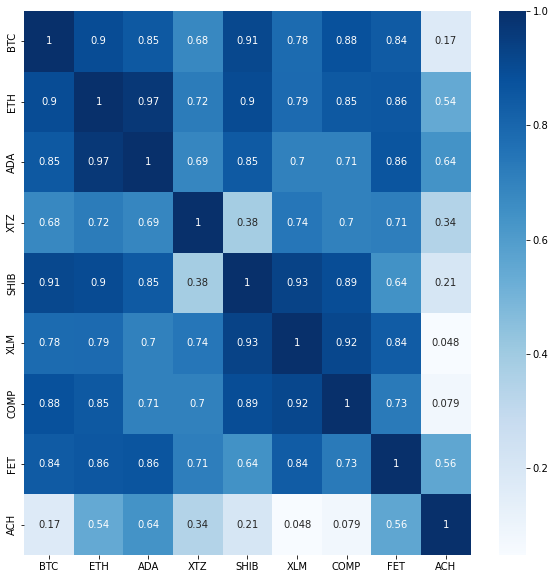

In [134]:
# Correlation Matrix (heatmap)
plt.figure(figsize = (12,12))
sns.heatmap(df[data_cols].corr(),annot=True, cmap='Blues');

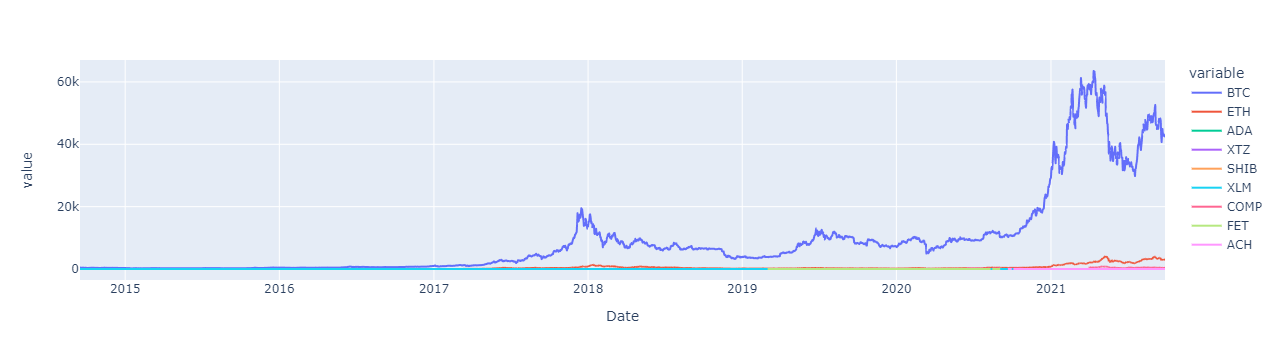

In [138]:
fig = px.line(df, y=data_cols)
fig.show();

In [78]:
fig = px.line(crypto, y=['BTC_7DAY_MA'] )
fig.show()

In [79]:
fig = px.line(crypto, y=['ETH'] )
fig.show()

In [80]:
fig = px.line(crypto, y=['ETH_7DAY_MA'] )
fig.show()

In [81]:
fig = px.line(crypto, y=['DOGE'] )
fig.show()

In [82]:
fig = px.line(crypto, y=['DOGE_7DAY_MA'] )
fig.show()

In [84]:
import pandas as pd
def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime) # change to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

In [86]:
df_btc = read_dataset(get_filename('BTC', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_eth = read_dataset(get_filename('ETH', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_ltc = read_dataset(get_filename('LTC', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_btc.head()

Reading data from BTC_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)
Reading data from ETH_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)
Reading data from LTC_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)


,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2017-10-02 08:00:00,4435.00,4448.98,4435.01,4448.85,85.51,379813.67
2017-10-02 09:00:00,4448.84,4470.00,4448.85,4464.49,165.17,736269.53
2017-10-02 10:00:00,4450.27,4469.00,4464.49,4461.63,194.95,870013.62
2017-10-02 11:00:00,4399.00,4461.63,4461.63,4399.51,326.71,1445572.02
2017-10-02 12:00:00,4378.22,4417.91,4399.51,4383.00,549.29,2412712.73


In [87]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'LTC': df_ltc.close})
df.head()

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,4448.85,301.37,54.72
2017-10-02 09:00:00,4464.49,301.84,54.79
2017-10-02 10:00:00,4461.63,301.95,54.63
2017-10-02 11:00:00,4399.51,300.02,54.01
2017-10-02 12:00:00,4383.00,297.51,53.71


In [88]:
df.describe()

,BTC,ETH,LTC
count,2001.000000,2001.000000,2001.000000
mean,9060.256122,407.263793,106.790100
std,4404.269591,149.480416,89.142241
min,4150.020000,277.810000,48.610000
25%,5751.020000,301.510000,55.580000
50%,7319.950000,330.800000,63.550000
75%,11305.000000,464.390000,100.050000
max,19847.110000,858.900000,378.660000


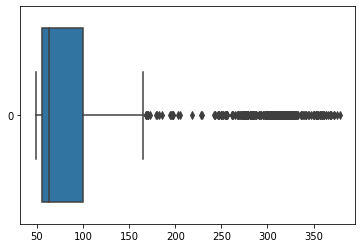

In [89]:
import seaborn as sns
ax = sns.boxplot(data=df['LTC'], orient="h")

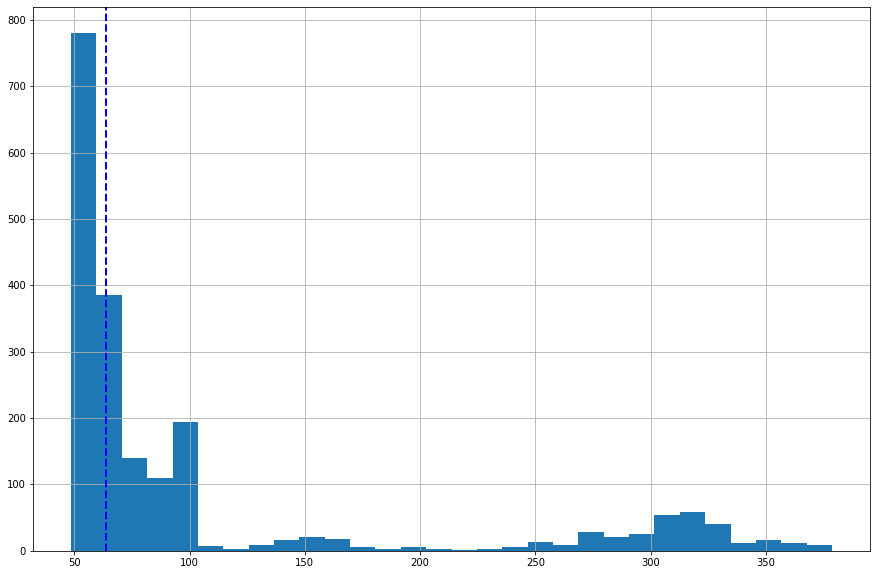

In [90]:
df['LTC'].hist(bins=30, figsize=(15,10)).axvline(df['LTC'].median(), color='b', linestyle='dashed', linewidth=2)

<AxesSubplot:xlabel='datetime'>

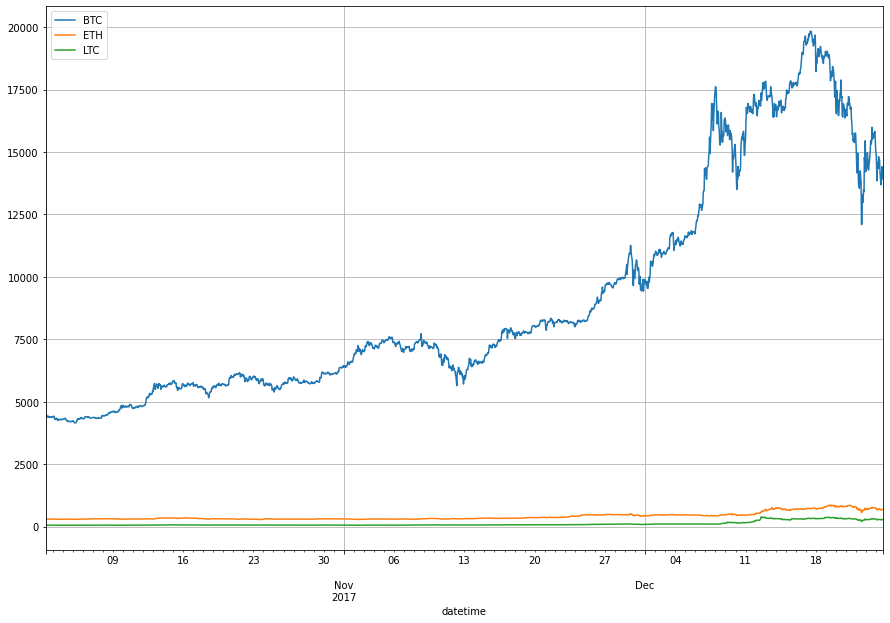

In [91]:
df.plot(grid=True, figsize=(15, 10))

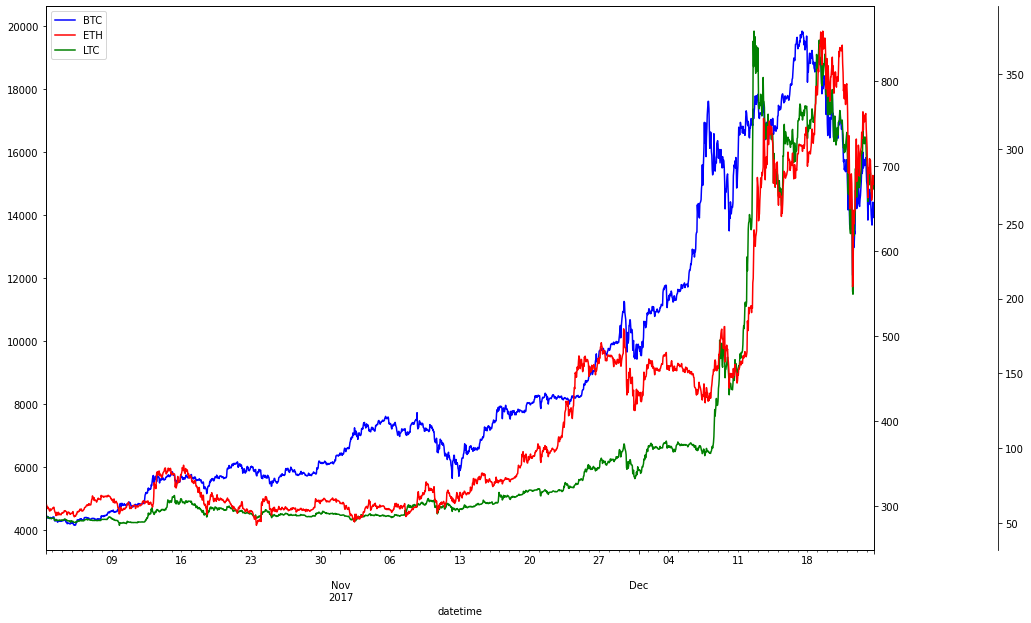

In [92]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['LTC'].plot(ax=ax2, style='g-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])

<AxesSubplot:>

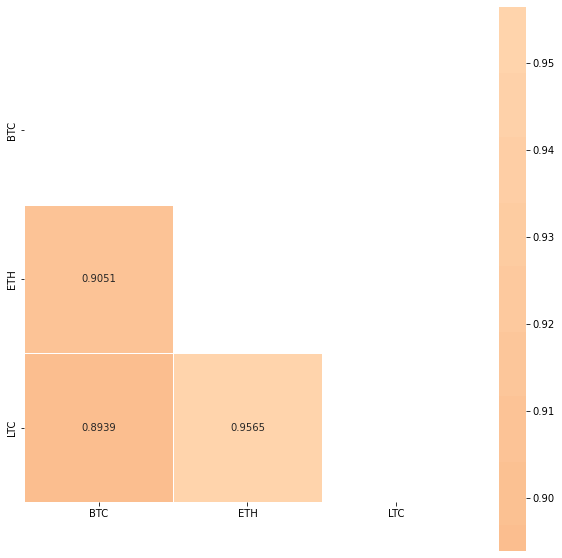

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

In [94]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,1.000000,1.000000,1.000000
2017-10-02 09:00:00,1.003516,1.001560,1.001279
2017-10-02 10:00:00,1.002873,1.001925,0.998355
2017-10-02 11:00:00,0.988909,0.995520,0.987025
2017-10-02 12:00:00,0.985198,0.987192,0.981542


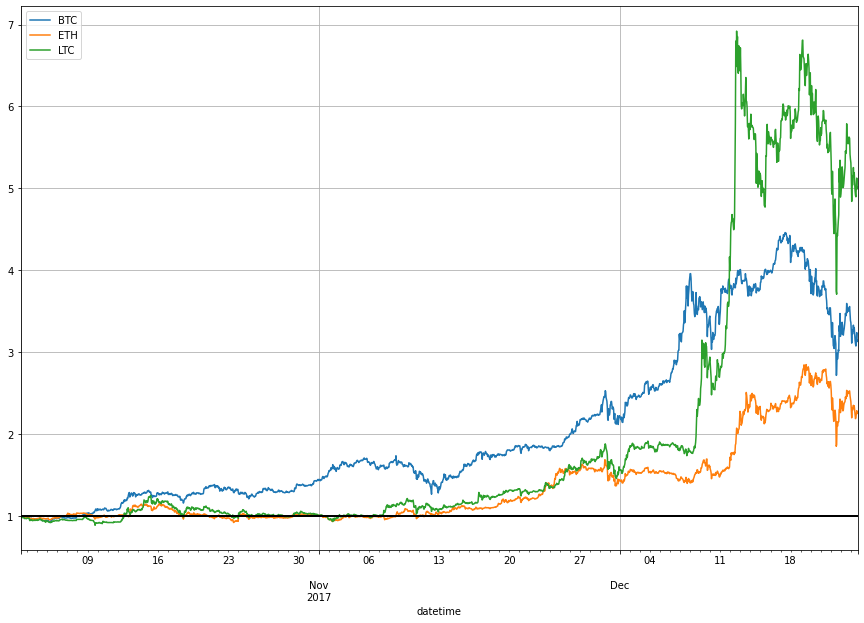

In [95]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)